problem statement :

"What factors affect students' academic performance?"

Through this, you can analyze different factors related to student performance, such as study time, parental involvement, sleep habits, etc. You can explore which variables have the most impact on students' grades.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 

In [2]:
df = pd.read_csv("student performance data.csv")

In [3]:
df

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,53,47
1,0.85566,3.2,5.9,55,35
2,0.68025,3.2,9.3,41,32
3,0.25936,3.2,8.2,47,34
4,0.60447,3.8,10.0,75,33
...,...,...,...,...,...
1383,0.44549,5.5,8.0,51,41
1384,0.52466,4.9,6.5,63,37
1385,0.88197,3.9,6.2,54,36
1386,0.47336,3.5,7.3,61,34


In [4]:
df.shape

(1388, 5)

In [5]:
df.columns

Index(['Socioeconomic Score', 'Study Hours', 'Sleep Hours', 'Attendance (%)',
       'Grades'],
      dtype='object')

In [6]:
df.isna().sum()

Socioeconomic Score    0
Study Hours            0
Sleep Hours            0
Attendance (%)         0
Grades                 0
dtype: int64

In [7]:
df.describe()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
count,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000
mean,0.552274,4.560807,8.047262,58.536023,40.691643
std,0.261272,1.897581,1.370700,11.675287,9.467358
min,0.101280,0.800000,4.800000,40.000000,32.000000
25%,0.322118,3.475000,7.000000,49.000000,34.000000
50%,0.545945,3.900000,8.400000,57.000000,35.000000
75%,0.789610,5.900000,9.100000,66.000000,47.000000
max,0.999820,10.000000,10.000000,100.000000,91.000000


In [8]:
df.duplicated().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
1383    False
1384    False
1385    False
1386    False
1387    False
Length: 1388, dtype: bool>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388 entries, 0 to 1387
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Socioeconomic Score  1388 non-null   float64
 1   Study Hours          1388 non-null   float64
 2   Sleep Hours          1388 non-null   float64
 3   Attendance (%)       1388 non-null   int64  
 4   Grades               1388 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 54.3 KB


In [10]:
df.head()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,53,47
1,0.85566,3.2,5.9,55,35
2,0.68025,3.2,9.3,41,32
3,0.25936,3.2,8.2,47,34
4,0.60447,3.8,10.0,75,33


In [11]:
df.shape

(1388, 5)

<Axes: xlabel='Socioeconomic Score'>

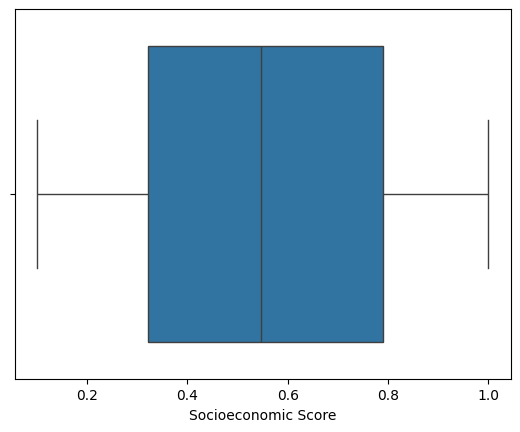

In [12]:
sns.boxplot(x="Socioeconomic Score" , data=df )

<Axes: xlabel='Study Hours'>

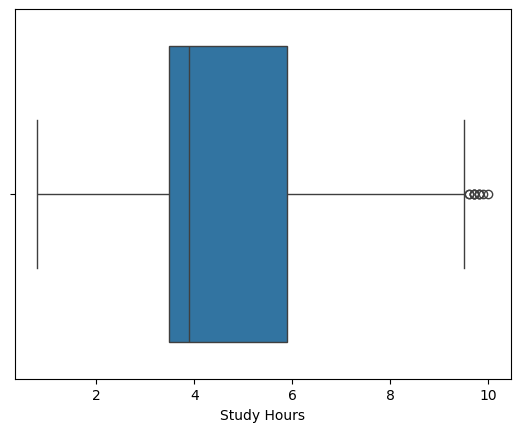

In [13]:
sns.boxplot(x="Study Hours" , data=df )

<Axes: xlabel='Sleep Hours'>

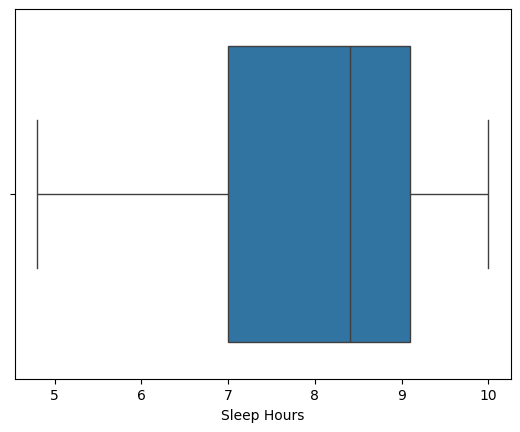

In [14]:
sns.boxplot(x="Sleep Hours" , data=df )

<Axes: xlabel='Attendance (%)'>

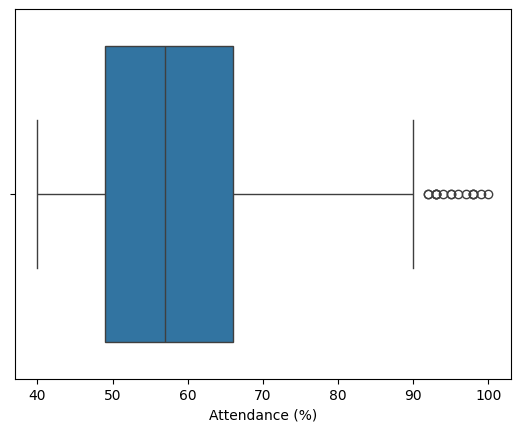

In [15]:
sns.boxplot(x="Attendance (%)" , data=df )

<Axes: xlabel='Grades'>

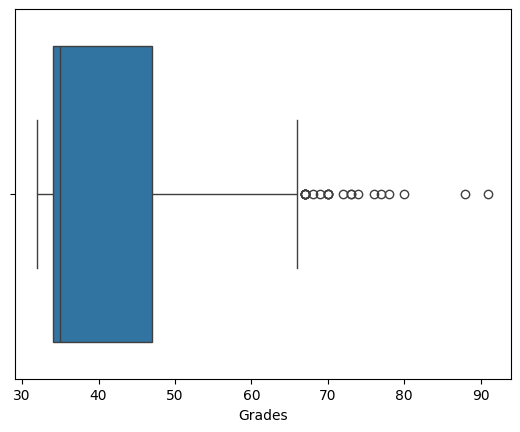

In [16]:
sns.boxplot(x="Grades" , data=df )

In [17]:
df = df [df ["Grades"] < df["Grades"].quantile(0.99)]
df = df [df ["Attendance (%)"] < df["Attendance (%)"].quantile(0.99)]
df = df [df ["Study Hours"] < df ["Study Hours"].quantile(0.99)]

In [18]:
df

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,53,47
1,0.85566,3.2,5.9,55,35
2,0.68025,3.2,9.3,41,32
3,0.25936,3.2,8.2,47,34
4,0.60447,3.8,10.0,75,33
...,...,...,...,...,...
1383,0.44549,5.5,8.0,51,41
1384,0.52466,4.9,6.5,63,37
1385,0.88197,3.9,6.2,54,36
1386,0.47336,3.5,7.3,61,34


In [19]:
df.shape

(1344, 5)

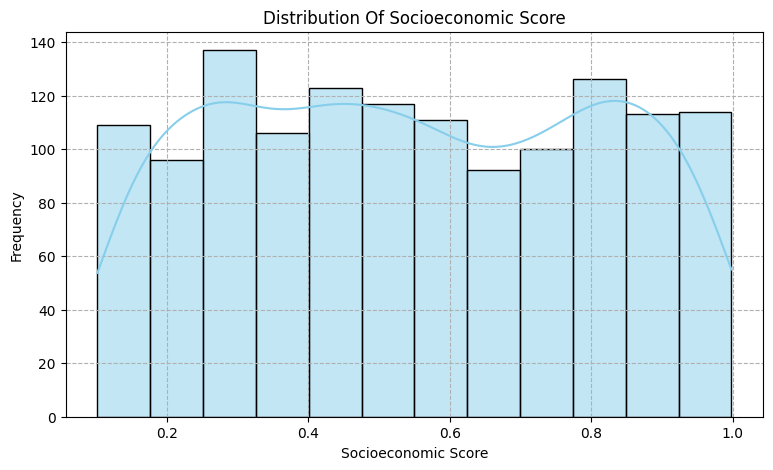

In [20]:

plt.figure(figsize=(9, 5))

# Create histogram with KDE
sns.histplot(x="Socioeconomic Score", kde=True, data=df, color='skyblue')

# Add title and labels
plt.title("Distribution Of Socioeconomic Score")
plt.xlabel("Socioeconomic Score")
plt.ylabel("Frequency")

# Add grid lines
plt.grid(True, linestyle='--')

# Show the plot
plt.show()


Observation : "The socioeconomic score is fairly evenly distributed with slight variations. This suggests a relatively balanced socioeconomic status among the population."

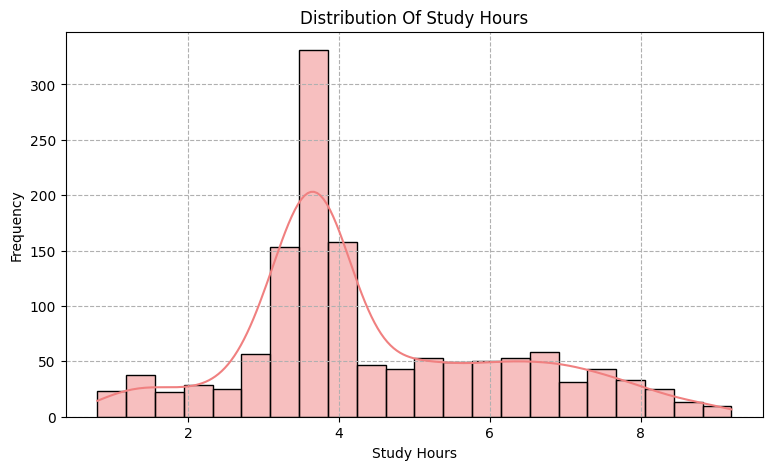

In [21]:
plt.figure(figsize=(9, 5))

# Create histogram with KDE
sns.histplot(x="Study Hours", kde=True, data=df, color='lightcoral')

# Add title and labels
plt.title("Distribution Of Study Hours")
plt.xlabel("Study Hours")
plt.ylabel("Frequency")

# Add grid lines
plt.grid(True, linestyle='--')

# Show the plot
plt.show()



Observation: "The frequency of students studying between 3 to 4 hours is the highest, while the number of students studying for fewer or more hours is relatively low."


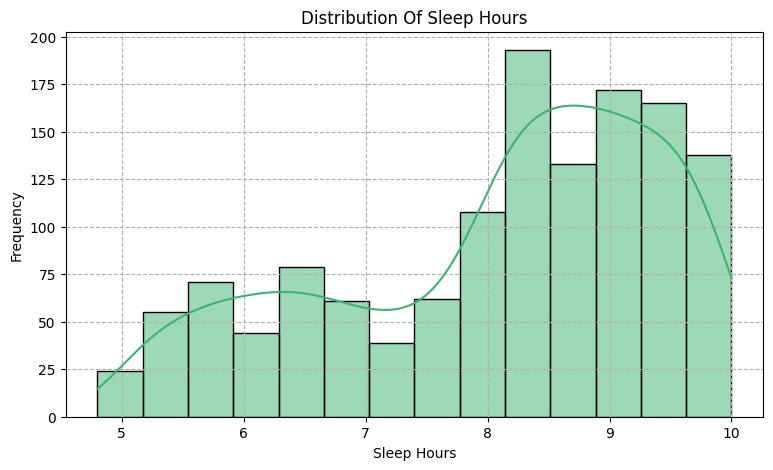

In [22]:
plt.figure(figsize=(9, 5))

sns.histplot(x="Sleep Hours", kde=True, data=df, color='mediumseagreen')

plt.title("Distribution Of Sleep Hours")
plt.xlabel("Sleep Hours")
plt.ylabel("Frequency")

plt.grid(True, linestyle='--')

plt.show()


Observation : "Fewer students sleep between 5 to 7 hours, while the frequency increases for those sleeping between 8 to 10 hours"

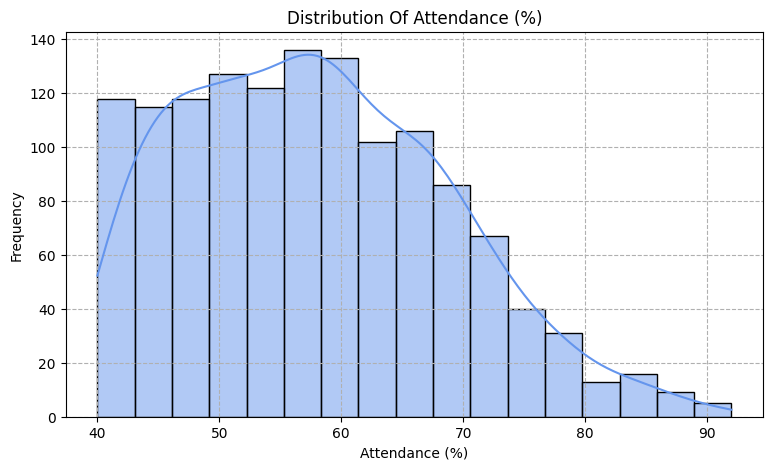

In [23]:
plt.figure(figsize=(9,5))

sns.histplot(x="Attendance (%)", kde=True, data=df, color='cornflowerblue')

plt.title("Distribution Of Attendance (%)")
plt.xlabel("Attendance (%)")
plt.ylabel("Frequency")

plt.grid(True, linestyle='--')

plt.show()


Observation : "The distribution of attendance shows a decreasing trend".

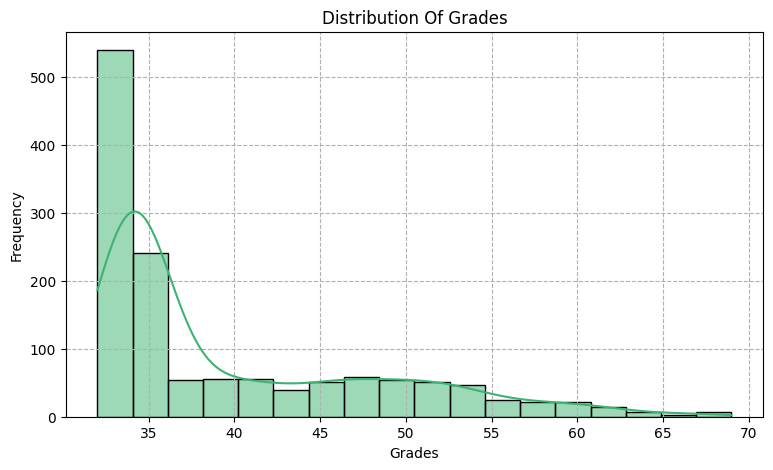

In [24]:
plt.figure(figsize=(9, 5))

sns.histplot(x="Grades", kde=True, data=df, color='mediumseagreen')

plt.title("Distribution Of Grades")
plt.xlabel("Grades")
plt.ylabel("Frequency")

plt.grid(True, linestyle='--')

plt.show()


Observation : The majority of students scored between 30 to 40 indicating low academic performance showing that very few students has high grades.

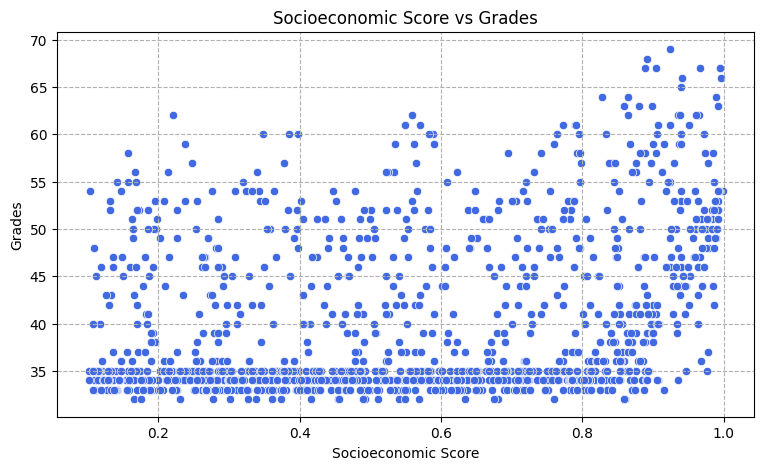

In [25]:
plt.figure(figsize=(9, 5))

sns.scatterplot(x="Socioeconomic Score", y="Grades", data=df, color='royalblue')

plt.title("Socioeconomic Score vs Grades")
plt.xlabel("Socioeconomic Score")
plt.ylabel("Grades")

plt.grid(True, linestyle='--')

plt.show()


Observation : As the socio-economic score increases, the grade also tends to increase, showing a positive relationship between them

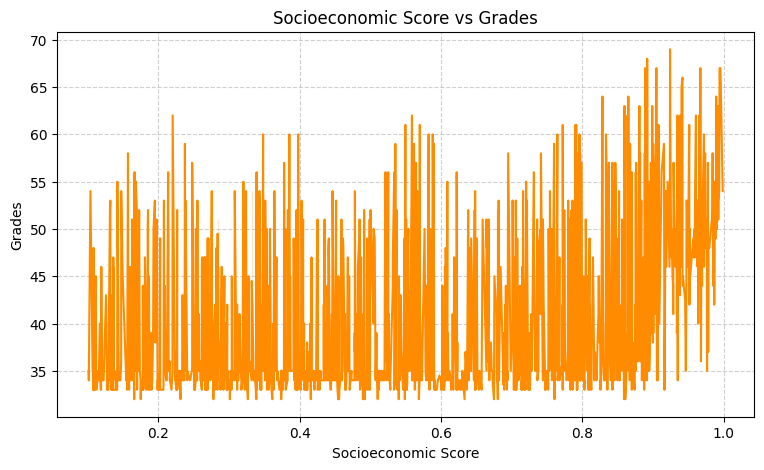

In [26]:

plt.figure(figsize=(9,5))

sns.lineplot(x="Socioeconomic Score", y="Grades", data=df, color='darkorange')

plt.title("Socioeconomic Score vs Grades")
plt.xlabel("Socioeconomic Score")
plt.ylabel("Grades")

plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


Observation : As the socio-economic score increases, the grade also tends to increase, showing a positive relationship between them

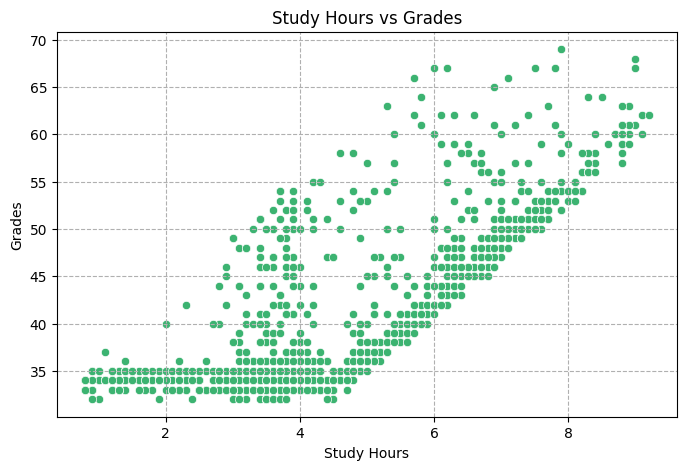

In [27]:
#grade vs study hr

plt.figure(figsize=(8, 5))

sns.scatterplot(x="Study Hours", y="Grades", data=df, color="mediumseagreen")

plt.title("Study Hours vs Grades")
plt.xlabel("Study Hours")
plt.ylabel("Grades")

plt.grid(True, linestyle='--')

plt.show()


Observation : The graph shows that as the study hours increases grades are also increasing.

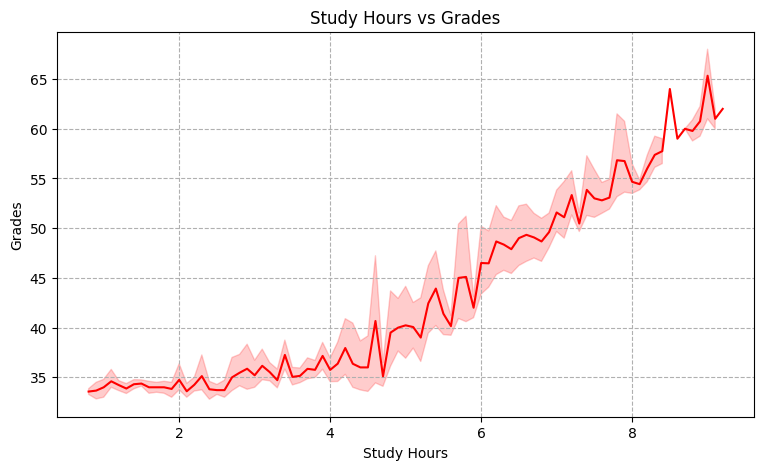

In [28]:
plt.figure(figsize=(9,5))
                
sns.lineplot(x="Study Hours", y="Grades", data=df, color="red")

plt.title("Study Hours vs Grades")
plt.xlabel("Study Hours")
plt.ylabel("Grades")

plt.grid(True, linestyle='--')

plt.show()


Observation : Graph shows that as study hours increases are also increasing 

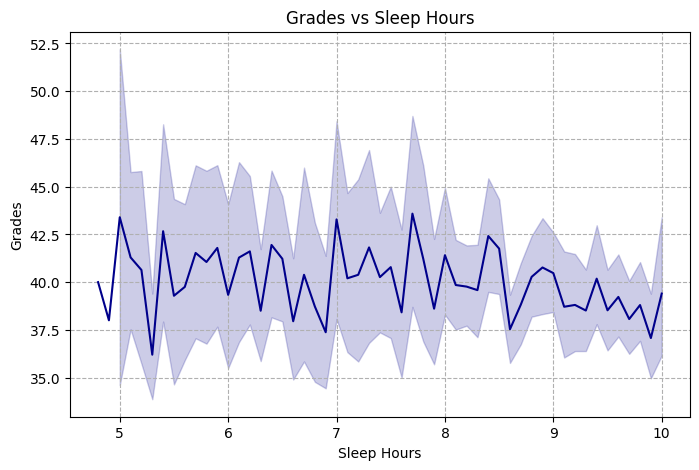

In [29]:
plt.figure(figsize=(8, 5))

sns.lineplot(x="Sleep Hours", y="Grades", data=df, color="darkblue")

plt.title("Grades vs Sleep Hours")
plt.xlabel("Sleep Hours")
plt.ylabel("Grades")

plt.grid(True, linestyle='--')

plt.show()


Observation : "The graph shows a negative correlation between sleep hours and grades, indicating that as sleep hours increase, grades tend to decrease. This suggests that excessive sleep may be associated with lower academic performance, possibly due to reduced time for studying and engaging with course materials."










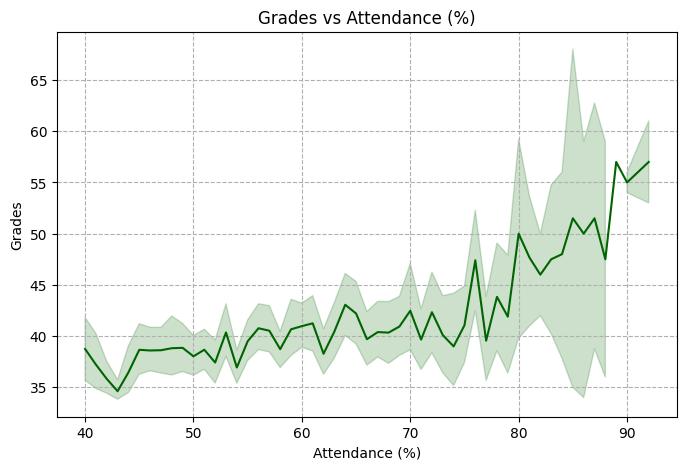

In [30]:


plt.figure(figsize=(8, 5))

sns.lineplot(x="Attendance (%)", y="Grades", data=df, color="darkgreen")

plt.title("Grades vs Attendance (%)")
plt.xlabel("Attendance (%)")
plt.ylabel("Grades")

plt.grid(True, linestyle='--')

plt.show()


Observation : "The graph indicates a positive correlation between attendance and grades, showing that as attendance increases, grades tend to improve. This suggests that regular class attendance plays a significant role in enhancing academic performance by allowing students to better understand and retain course material."











Conclusion:

More study hours and better attendance are positively correlated with higher grades, as they contribute to better understanding and retention of the material. In contrast, excessive sleep hours may be linked to lower grades, as they can reduce time for studying and engaging with course content. A balance between study, sleep, and attendance is essential for academic success.


In [31]:
#common factor grade

In [32]:
X = df.drop(columns=['Grades'])  # Independent variables
Y = df['Grades']  # Target variable


In [33]:
x_train, x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [34]:
print('Shape of X_train is -' , x_train.shape)
print('Shape of X_train is -' , x_train.shape)
print('Shape of y_train is -' , y_train.shape)
print ('Shape of y_train is -' , y_train.shape)

Shape of X_train is - (1075, 4)
Shape of X_train is - (1075, 4)
Shape of y_train is - (1075,)
Shape of y_train is - (1075,)


In [35]:
reg = LinearRegression()

In [36]:
reg.fit(x_train, y_train)

LinearRegression()

In [37]:
reg.predict(x_test)

array([36.22191236, 34.29393297, 52.31014097, 42.72647981, 56.18848428,
       20.17640845, 40.46831939, 41.33671102, 54.83260787, 35.03902632,
       38.35279573, 37.05372552, 49.10729111, 28.00375792, 37.14681332,
       30.83135669, 41.90513853, 40.57334448, 34.48097733, 38.70431138,
       57.34108654, 48.65613802, 48.71598721, 42.24500358, 38.90243982,
       30.25833151, 39.40105524, 35.64158763, 31.65584825, 34.43400331,
       31.03511086, 27.96913468, 37.04163601, 44.76841798, 46.76570546,
       51.64743612, 43.04041527, 30.55978151, 40.93942057, 27.4572321 ,
       52.72653338, 48.53198751, 41.48349004, 36.71196467, 42.06952653,
       46.39213947, 42.54420879, 35.70880083, 33.43897105, 32.95504347,
       36.40578418, 38.93380489, 35.23759046, 32.81748867, 38.73087001,
       34.91388605, 52.79219706, 36.21208393, 56.62813787, 34.83225476,
       55.69727484, 42.21789106, 44.40317898, 44.45598408, 40.23699104,
       58.75358808, 41.9839512 , 35.04756481, 52.89098144, 36.21

In [38]:
r2_score(y_test,reg.predict(x_test))

0.7673007557987687